<a href="https://colab.research.google.com/github/leofmandrade/SuperCompProjeto/blob/main/C%C3%B3pia_de_Supercomp_Projeto_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto SuperComputação 2024.1

## Otimização de Rotas de Veículos (_Vehicle Routing Problem_ - VRP)

**Objetivo:**

Desenvolver uma aplicação em C++ que otimize as rotas de uma frota de veículos destinados à entrega de produtos a diversos clientes, buscando minimizar o custo total das rotas.


**Descrição:**

Você está encarregado de criar uma solução computacional para o problema de Otimização de Rotas de Veículos (VRP) para uma empresa de logística. A empresa possui uma frota de veículos que são usados para entregar produtos a uma série de clientes. Cada veículo tem uma capacidade de carga máxima, e cada cliente tem uma demanda específica que deve ser atendida. O objetivo é determinar as rotas ótimas para os veículos, de forma que todos os clientes sejam atendidos, respeitando as restrições de capacidade dos veículos, e minimizando o custo total das entregas.


**Restrições e Requisitos:**
1. **Capacidade dos Veículos:** Cada veículo tem uma capacidade máxima de carga que não pode ser excedida.
2. **Demanda dos Clientes:** Cada cliente tem uma demanda específica que deve ser completamente atendida por um único veículo.
3. **Custo da Rota:** Cada rota possui um custo, que simboliza o cômputo agregado da distância percorrida, do tempo de entrega, e do consumo de combustível. O objetivo é minimizar o custo total.
4. **Número máximo de visitas por rota:** Cada rota pode visitar um número máximo de cidades.
5. **Ponto de Partida e Chegada:** Todos os veículos começam e terminam suas rotas no depósito da empresa.


**Desafios Computacionais:**

- O VRP é um problema NP-difícil, o que significa que sua complexidade computacional cresce exponencialmente com o aumento do número de clientes e veículos.
- A busca exaustiva por todas as possíveis combinações de rotas torna-se impraticável para instâncias maiores do problema.


**Composição da Solução:**
1. Implementação de um algoritmo de _busca global_ para o problema (força bruta);
2. Implementação de alguma solução aproximada (_heurística_ ou _busca local_);
3. Implementação de 2 soluções paralelizadas, sendo:

  a. _Paralelização com Threads OpenMP_: Utilizar threads e a biblioteca OpenMP para paralelizar o algoritmo desenvolvido, com o objetivo de reduzir o tempo de execução. Analisar e implementar a paralelização de componentes do algoritmo que possam se beneficiar da execução concorrente, como a geração de soluções iniciais ou a busca local.

  b. _Paralelização e Distribuição do Processamento com MPI_: Implementar uma versão do algoritmo que utilize a interface de passagem de mensagens MPI para distribuir o processo de busca de soluções em múltiplos processos, possivelmente executando em diferentes nós de um cluster. A estratégia deve permitir a exploração paralela do espaço de soluções e a troca eficiente de informações entre os processos.



**Entregáveis:**

1. **Código Fonte:** Código fonte em C++ comentado e organizado.
2. **Relatório:** Um relatório descrevendo a abordagem utilizada, incluindo descrição das heurísticas e métodos de busca local, bem como as estratégias de paralelização adotadas.
3. **Análise de Desempenho:** Uma análise de desempenho da solução proposta, incluindo tempos de execução e qualidade das soluções encontradas, com base em instâncias de teste de diferentes tamanhos.
4. **Instruções de Uso:** Breve documentação sobre como compilar e executar a aplicação, incluindo exemplos de uso.


**DICA**:
Não deixe de estudar os exemplos deste link https://vrpy.readthedocs.io/en/master/examples.html, para entender como gerar a avaliar soluções para o problema. Compare sua solução com a solução desta biblioteca!

### GERAÇÃO DE INSTÂNCIAS DO PROBLEMA

Execute o código abaixo algumas vezes gerando instâncias de tamanhos e complexidades distintas. Você deve experimentar alterações de:
- **num_nos**: número de cidades a serem visitados;
- **probabilidade**: a probabilidade de ser criada uma rota direta entre 2 cidades;


In [22]:
import random
# from networkx import set_node_attributes

def gerar_dicionario_demandas(N):
    """
    Gera um dicionário onde a chave é um int de 1 até N e o valor é um inteiro aleatório de 1 até 10.

    :param N: Número máximo para as chaves do dicionário.
    :return: Dicionário com chaves de 1 até N e valores inteiros aleatórios de 1 até 10.
    """
    return {i: random.randint(1, 10) for i in range(1, N)}


def gerar_entradas_grafo(num_nos, max_peso=100, probabilidade=0.25):
    """
    Gera um grafo para o problema de otimização de rotas de veículos.

    :param num_nos: Número de nós no grafo, incluindo o depósito.
    :param max_peso: Peso máximo para as arestas do grafo.
    :param probabilidade: Probabilidade de criar uma rota entre duas cidades.
    :return: Um dicionário representando o grafo onde as chaves são tuplas representando as arestas (nó1, nó2)
             e os valores são os pesos dessas arestas.
    """
    grafo = {}
    # Gerar pesos para arestas entre o depósito e outros nós
    for i in range(1, num_nos):
        grafo[(0, i)] = random.randint(1, max_peso)
        grafo[(i, 0)] = grafo[(0, i)]  # Assume que a distância de volta ao depósito é a mesma

    # Gerar pesos para arestas entre todos os outros pares de nós
    for i in range(1, num_nos+1):
        for j in range(i+1, num_nos):
            if random.random() > (1 - probabilidade):  # Verifica a probabilidade
                peso = random.randint(1, max_peso)
                grafo[(i, j)] = peso

    return grafo

############################################
#             Exemplo de uso
############################################
num_nos = 8                             # Número total de nós incluindo o depósito
demandas = gerar_dicionario_demandas(num_nos)  # Gera as demandas para cada nó
grafo = gerar_entradas_grafo(num_nos)          # Gera o grafo que representa os locais e custos entre eles

# Salva o grafo em um arquivo TXT
with open('grafo.txt', 'w') as arquivo:
  arquivo.write(str(num_nos) + "\n")    # Número de nós, incluindo depósito
  for local, demanda in demandas.items():
    linha = f"{local} {demanda}\n"      # Par LOCAL DEMANDA
    arquivo.write(linha)

  arquivo.write(str(len(grafo)) + "\n") # Número de arestas
  for aresta, peso in grafo.items():
    linha = f"{aresta[0]} {aresta[1]} {peso}\n" # Trio: ORIGEM DESTINO CUSTO
    arquivo.write(linha)


### GERAÇÃO DE SOLUÇÕES

Instale a biblioteca [VRPy](https://vrpy.readthedocs.io/en/latest/getting_started.html) para resolver problemas de otimização de rotas.

Para cada instância do problema gerada, execute este código para gerar a solução esperada.

Não deixe de estudar a documentação da biblioteca! Especialmente este link: https://vrpy.readthedocs.io/en/latest/examples.html#a-simple-example

Aqui você pode gerar soluções diferentes alterando:
- **load_capacity**: a quantidade e capacidade de veículos;
- **num_stops**: o número máximo de paradas numa rota;

In [23]:
!pip install vrpy

In [24]:
from networkx import DiGraph, set_node_attributes
from vrpy import VehicleRoutingProblem


def ler_arquivo_grafo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as arquivo:
        # Lê o número de nós
        N = int(arquivo.readline().strip())-1

        # Lê as demandas dos nós
        demandas = {}
        for _ in range(N):
            linha = arquivo.readline().strip().split()
            id_no, demanda = int(linha[0]), int(linha[1])
            demandas[id_no] = demanda

        # Lê o número de arestas
        K = int(arquivo.readline().strip())

        # Lê as arestas
        arestas = []
        for _ in range(K):
            linha = arquivo.readline().strip().split()
            origem, destino, peso = int(linha[0]), int(linha[1]), int(linha[2])
            arestas.append((origem, destino, peso))

    return demandas, arestas

############################################
#             Usando a funcao
############################################
caminho_arquivo = 'grafo.txt'
demandas, arestas = ler_arquivo_grafo(caminho_arquivo)

G = DiGraph()
for inicio, fim, custo in arestas:
    if inicio==0: inicio="Source"
    if fim==0: fim="Sink"
    G.add_edge(inicio, fim, cost=custo)

set_node_attributes(G, values=demandas, name="demand")

prob = VehicleRoutingProblem(G, load_capacity=10)  # Pode alterar a capacidade
prob.num_stops = 5                                # Pode alterar o número máximo de paradas
prob.solve()

In [25]:
prob.best_routes

{1: ['Source', 5, 'Sink'],
 2: ['Source', 1, 7, 'Sink'],
 3: ['Source', 2, 'Sink'],
 4: ['Source', 4, 'Sink'],
 5: ['Source', 3, 6, 'Sink']}

In [26]:
prob.best_value

842

In [27]:
prob.best_routes_cost

{1: 172, 2: 188, 3: 56, 4: 192, 5: 234}

In [28]:
prob.best_routes_load

{1: 10, 2: 7, 3: 7, 4: 9, 5: 7}

 ### 1. Algoritmo de busca global

Dado o pseudo-código abaixo, implemente-o em C++ e compare (com um gráfico) seu tempo de execução em função de diferentes tamanhos de entrada. Note que ele NÃO ESTÁ COMPLETO!

```cpp
Função ResolverVRPComDemanda(Locais, Demanda, C):
    // Locais: Lista de locais para entrega (excluindo o depósito)
    // Demanda: Dicionário mapeando cada local à sua demanda
    // C: Capacidade do veículo
    
    MelhorRota = NULL
    MenorCusto = INFINITO

    // Gera todas as combinações possíveis de rotas considerando a capacidade do veículo
    Combinações = GerarTodasAsCombinações(Locais)
    
    Para cada combinação em Combinações faça:
        Se VerificarCapacidade(combinação, Demanda, C) então:
            CustoAtual = CalcularCusto(combinação)
            Se CustoAtual < MenorCusto então:
                MenorCusto = CustoAtual
                MelhorRota = combinação
                
    Retornar MelhorRota, MenorCusto

Função GerarTodasAsCombinações(Locais):
    // Gera todas as permutações possíveis de locais e agrupa em rotas válidas conforme a capacidade
    // Esta função é bastante complexa, pois precisa considerar todas as subdivisões possíveis dos locais em rotas que atendam à capacidade do veículo
    // Retorna uma lista de combinações válidas
    Retornar combinações

Função VerificarCapacidade(Rota, Demanda, C):
    // Verifica se a demanda total da rota não excede a capacidade do veículo
    CargaTotal = 0
    Para cada local em Rota faça:
        CargaTotal += Demanda[local]
    Se CargaTotal > C então:
        Retornar Falso
    Senão:
        Retornar Verdadeiro

Função CalcularCusto(Rota):
    // Calcula o custo de uma rota com base na distância, tempo ou outro critério
    // O custo pode depender de fatores como a distância total percorrida, o número de veículos necessários, entre outros
    Retornar custo

// Início do programa
// Define os locais, suas demandas e a capacidade do veículo
Locais = [...]
Demanda = {...}
Capacidade = C

MelhorRota, MenorCusto = ResolverVRPComDemanda(Locais, Demanda, Capacidade)
Exibir "A melhor rota é:", MelhorRota, "com custo total de:", MenorCusto
```

In [29]:
%%writefile exercicio1.cpp

#include <iostream>
#include <vector>
#include <map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <chrono>

using namespace std;

// Estrutura para armazenar os dados do grafo
struct Grafo {
    int numLocais;
    vector<int> locais;
    map<int, int> demandas;
    vector<vector<int>> rotas;
};

// Função para ler o grafo a partir do arquivo de entrada
Grafo LeituraGrafo(const string &nomeArquivo, int &numLocais, int &numRotas) {
    ifstream arquivoEntrada(nomeArquivo);
    Grafo grafo;
    // Lê o número de locais
    arquivoEntrada >> grafo.numLocais;
    numLocais = grafo.numLocais;
    // Lê os locais e as demandas
    grafo.locais.push_back(0);  // Adiciona o depósito (local 0)
    grafo.demandas[0] = 0;      // A demanda do depósito é 0
    for (int i = 1; i < grafo.numLocais; ++i) {
        int local, demanda;
        arquivoEntrada >> local >> demanda;
        grafo.locais.push_back(local);
        grafo.demandas[local] = demanda;
    }
    // Lê o número de rotas
    arquivoEntrada >> numRotas;
    for (int i = 0; i < numRotas; ++i) {
        int origem, destino, custo;
        arquivoEntrada >> origem >> destino >> custo;
        grafo.rotas.push_back({origem, destino, custo});
    }
    return grafo;
}


// Gera todas as permutações possíveis de locais (exceto o depósito)
vector<vector<int>> GerarTodasAsCombinacoes(vector<int> &locais) {
    vector<vector<int>> combinacoes;
    do {
        combinacoes.push_back(locais);
    } while (next_permutation(locais.begin() + 1, locais.end()));  // Ignora o primeiro elemento (depósito)
    return combinacoes;
}


// Adiciona zeros no início e no fim de cada permutação
vector<vector<int>> AdicionarZeros(vector<vector<int>> &combinacoes) {
    vector<vector<int>> combinacoesComZeros;
    for (auto &combinacao : combinacoes) {
        if (combinacao.front() != 0) {  // Adiciona 0 no início se não estiver presente
            combinacao.insert(combinacao.begin(), 0);
        }
        if (combinacao.back() != 0) {   // Adiciona 0 no fim se não estiver presente
            combinacao.push_back(0);
        }
        combinacoesComZeros.push_back(combinacao);
    }
    return combinacoesComZeros;
}


// Verifica se as rotas nas permutações são válidas
vector<vector<int>> ValidacaoRotas(vector<vector<int>> &combinacoes, vector<vector<int>> &rotas) {
    vector<vector<int>> combinacoesValidas;
    for (auto &combinacao : combinacoes) {
        bool valida = true;
        for (size_t i = 0; i < combinacao.size() - 1; ++i) {
            int origem = combinacao[i];
            int destino = combinacao[i + 1];
            bool rotaExiste = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                return rota[0] == origem && rota[1] == destino;
            });
            if (!rotaExiste) {
                // Verifica se existe uma rota passando pelo depósito
                bool origemZero = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                    return rota[0] == origem && rota[1] == 0;
                });
                bool destinoZero = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                    return rota[0] == 0 && rota[1] == destino;
                });
                if (!origemZero || !destinoZero) {
                    valida = false;
                    break;
                } else {
                    combinacao.insert(combinacao.begin() + i + 1, 0);  // Insere depósito entre origem e destino
                }
            }
        }
        if (valida) {
            combinacoesValidas.push_back(combinacao);
        }
    }
    return combinacoesValidas;
}


// Filtra as permutações por capacidade
vector<vector<int>> VerificarCapacidade(vector<vector<int>> &combinacoes, map<int, int> &demandas, int capacidade) {
    vector<vector<int>> combinacoesValidas;
    for (auto &combinacao : combinacoes) {
        int cargaAtual = 0;
        bool valida = true;
        for (int local : combinacao) {
            if (local == 0) {  // Reseta a carga ao visitar o depósito
                cargaAtual = 0;
            } else {
                cargaAtual += demandas.at(local);
                if (cargaAtual > capacidade) {  // Verifica se a capacidade foi excedida
                    valida = false;
                    break;
                }
            }
        }
        if (valida) {
            combinacoesValidas.push_back(combinacao);
        }
    }
    return combinacoesValidas;
}


// Calcula o custo total de uma rota
int CalcularCusto(const vector<int> &rota, const vector<vector<int>> &rotas) {
    int custoTotal = 0;
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        int origem = rota[i];
        int destino = rota[i + 1];
        auto it = find_if(rotas.begin(), rotas.end(), [&](const vector<int> &r) {
            return r[0] == origem && r[1] == destino;
        });
        if (it != rotas.end()) {
            custoTotal += (*it)[2];
        }
    }
    return custoTotal;
}


// Resolve o VRP com demanda
pair<vector<int>, int> ResolverVRPComDemanda(vector<int> &locais, map<int, int> &demandas, vector<vector<int>> &rotas, int capacidade) {
    pair<vector<int>, int> melhorSolucao;
    melhorSolucao.second = numeric_limits<int>::max();  // Inicializa com o custo máximo possível
    // Gera todas as combinações possíveis
    vector<vector<int>> combinacoes = GerarTodasAsCombinacoes(locais);
    combinacoes = AdicionarZeros(combinacoes);
    combinacoes = ValidacaoRotas(combinacoes, rotas);
    combinacoes = VerificarCapacidade(combinacoes, demandas, capacidade);
    // Encontra a combinação com menor custo
    for (auto &combinacao : combinacoes) {
        int custo = CalcularCusto(combinacao, rotas);
        if (custo < melhorSolucao.second) {
            melhorSolucao.first = combinacao;
            melhorSolucao.second = custo;
        }
    }
    return melhorSolucao;
}


// Função para imprimir o resultado de forma formatada
void ImprimirResultado(const pair<vector<int>, int>& resultado) {
    // Mapeia as rotas formatadas para exibição
    map<int, vector<int>> rotasFormatadas;
    int rotaID = 1;
    vector<int> rotaAtual;
    // Separa as rotas nos trechos entre os depósitos (zeros)
    for (int local : resultado.first) {
        if (local == 0 && !rotaAtual.empty()) {
            rotasFormatadas[rotaID++] = rotaAtual;
            rotaAtual.clear();
        } else if (local != 0) {
            rotaAtual.push_back(local);
        }
    }
    if (!rotaAtual.empty()) {
        rotasFormatadas[rotaID] = rotaAtual;
    }
    // Exibe as rotas formatadas
    for (const auto& [id, rota] : rotasFormatadas) {
        cout << id << ": ['Source'";
        for (int local : rota) {
            cout << ", " << local;
        }
        cout << ", 'Sink']" << endl;
    }
    // Exibe o menor custo da rota encontrada
    cout << "Menor custo: " << resultado.second << endl;
}



int main() {
    auto start = chrono::high_resolution_clock::now();
    int numLocais, numRotas;
    string nomeArquivo = "./grafo.txt";
    Grafo grafo = LeituraGrafo(nomeArquivo, numLocais, numRotas);
    vector<int> locais = grafo.locais;
    map<int, int> demandas = grafo.demandas;
    vector<vector<int>> rotas = grafo.rotas;
    int capacidadeVeiculo = 10;
    cout << "Capacidade Veiculo: " << capacidadeVeiculo << endl;

    // Resolve o problema do VRP com demanda
    auto resultado = ResolverVRPComDemanda(locais, demandas, rotas, capacidadeVeiculo);
    // Exibe a melhor rota encontrada
    ImprimirResultado(resultado);
    auto end = chrono::high_resolution_clock::now();
    chrono::duration<double> duration = end-start;
    cout << "Duração: " << duration.count() << " segundos";
    cout << endl;

    return 0;
}


Overwriting exercicio1.cpp


In [30]:
!g++ exercicio1.cpp -o exercicio1

In [31]:
!./exercicio1

Capacidade Veiculo: 10
1: ['Source', 1, 7, 'Sink']
2: ['Source', 2, 'Sink']
3: ['Source', 4, 'Sink']
4: ['Source', 3, 6, 'Sink']
5: ['Source', 5, 'Sink']
Menor custo: 842
Duração: 0.0638833 segundos


### 2. Solução aproximada

Para problemas complexos as heurísticas são ferramentas essenciais, pois oferecem soluções aproximadas em tempo razoável, especialmente quando o problema é grande demais para abordagens de força bruta ou métodos exatos. Heurísticas não garantem a melhor solução possível, mas frequentemente encontram soluções muito boas com um esforço computacional significativamente menor.

Algumas das heurísticas e métodos meta-heurísticos mais comuns para o VRP incluem:

  - _Heurística de Inserção Mais Próxima_: Começa com uma rota contendo apenas o depósito e, em seguida, iterativamente insere o cliente mais próximo em sua posição de menor custo até que todos os clientes sejam incluídos. Esta abordagem é simples e relativamente rápida, mas pode não encontrar a melhor solução possível.
  - _Heurística de Clarke e Wright (Economias)_: Uma das heurísticas mais conhecidas para o VRP, que começa com cada cliente em sua própria rota e, em seguida, progressivamente mescla rotas que resultam nas maiores "economias", ou seja, reduções no custo total da rota. Essa abordagem tenta equilibrar o custo de visitar cada cliente com o custo de conectar rotas.
  - _Algoritmos Genéticos_: Uma classe de métodos de busca e otimização baseados nos princípios de seleção natural e genética. Eles usam operações como seleção, cruzamento e mutação para evoluir uma população de soluções ao longo do tempo, em busca da melhor solução possível.

Implemente uma das heurísticas citadas, ou elabore outra solução aproximada, que dê uma solução em tempo razoável para o problema. Aqui, além de implementar o algoritmo, é importante que você descreva brevemente sua estratégia de solução no relatório.

Mesmo cortes mais simples do espaço de busca estão valendo, por exemplo, considerando que há um limite máximo de visitas em cada rota, podemos de cara cortar as combinações de cidades que ultrapassam esse limite. Podemos, ainda, estabelecer um limite mínimo, para evitar rotas pequenas.





In [32]:
%%writefile exercicio2.cpp
#include <iostream>
#include <vector>
#include <map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <chrono>
#include <numeric> // Adicionada a biblioteca <numeric>
using namespace std;

// Estrutura para armazenar os dados do grafo
struct Grafo {
    int numLocais;
    vector<int> locais;
    map<int, int> demandas;
    vector<vector<int>> rotas;
};


// Função para ler o grafo a partir do arquivo de entrada
Grafo LeituraGrafo(const string &nomeArquivo, int &numLocais, int &numRotas) {
    ifstream arquivoEntrada(nomeArquivo);
    Grafo grafo;
    // Lê o número de locais
    arquivoEntrada >> grafo.numLocais;
    numLocais = grafo.numLocais;
    // Lê os locais e as demandas
    grafo.locais.push_back(0);  // Adiciona o depósito (local 0)
    grafo.demandas[0] = 0;      // A demanda do depósito é 0
    for (int i = 1; i < grafo.numLocais; ++i) {
        int local, demanda;
        arquivoEntrada >> local >> demanda;
        grafo.locais.push_back(local);
        grafo.demandas[local] = demanda;
    }
    // Lê o número de rotas
    arquivoEntrada >> numRotas;
    for (int i = 0; i < numRotas; ++i) {
        int origem, destino, custo;
        arquivoEntrada >> origem >> destino >> custo;
        grafo.rotas.push_back({origem, destino, custo});
    }
    return grafo;
}


// Função para encontrar o custo entre dois locais
int EncontrarCusto(int origem, int destino, const vector<vector<int>> &rotas) {
    for (const auto &rota : rotas) {
        if (rota[0] == origem && rota[1] == destino) {
            return rota[2];
        }
    }
    return numeric_limits<int>::max();  // Retorna custo máximo se a rota não existir
}


// Heurística de Clarke e Wright (Economias)
vector<vector<int>> ClarkeWright(const vector<int> &locais, const map<int, int> &demandas, const vector<vector<int>> &rotas, int capacidade) {
    vector<vector<int>> rotasAtuais(locais.size() - 1); // Uma rota para cada cliente
    map<pair<int, int>, int> economias;
    // Inicializa as rotas individuais
    for (size_t i = 1; i < locais.size(); ++i) {
        rotasAtuais[i - 1] = {0, locais[i], 0};
    }
    // Calcula as economias
    for (size_t i = 1; i < locais.size(); ++i) {
        for (size_t j = i + 1; j < locais.size(); ++j) {
            int custo0i = EncontrarCusto(0, locais[i], rotas);
            int custoj0 = EncontrarCusto(locais[j], 0, rotas);
            int custoiJ = EncontrarCusto(locais[i], locais[j], rotas);
            int economia = custo0i + custoj0 - custoiJ;
            economias[{locais[i], locais[j]}] = economia;
        }
    }
    // Ordena as economias em ordem decrescente
    vector<pair<pair<int, int>, int>> economiasOrdenadas(economias.begin(), economias.end());
    sort(economiasOrdenadas.begin(), economiasOrdenadas.end(), [](const auto &a, const auto &b) {
        return a.second > b.second;
    });
    // Mescla as rotas de acordo com as economias
    for (const auto &economia : economiasOrdenadas) {
        int i = economia.first.first;
        int j = economia.first.second;
        auto it_i = find_if(rotasAtuais.begin(), rotasAtuais.end(), [i](const vector<int> &rota) {
            return find(rota.begin(), rota.end(), i) != rota.end();
        });
        auto it_j = find_if(rotasAtuais.begin(), rotasAtuais.end(), [j](const vector<int> &rota) {
            return find(rota.begin(), rota.end(), j) != rota.end();
        });
        if (it_i != rotasAtuais.end() && it_j != rotasAtuais.end() && it_i != it_j) {
            int demandaTotal = accumulate(it_i->begin(), it_i->end(), 0, [&demandas](int sum, int local) {
                return sum + demandas.at(local);
            }) + accumulate(it_j->begin(), it_j->end(), 0, [&demandas](int sum, int local) {
                return sum + demandas.at(local);
            });
            if (demandaTotal <= capacidade) {
                // Mescla as rotas
                if (it_i->back() == 0 && it_j->front() == 0) {
                    it_i->pop_back();
                    it_i->insert(it_i->end(), it_j->begin() + 1, it_j->end());
                } else if (it_j->back() == 0 && it_i->front() == 0) {
                    it_j->pop_back();
                    it_j->insert(it_j->end(), it_i->begin() + 1, it_i->end());
                } else {
                    continue;
                }
                rotasAtuais.erase(it_j);
            }
        }
    }
    return rotasAtuais;
}


// Calcula o custo total de uma rota
int CalcularCusto(const vector<int> &rota, const vector<vector<int>> &rotas) {
    int custoTotal = 0;
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        int origem = rota[i];
        int destino = rota[i + 1];
        auto it = find_if(rotas.begin(), rotas.end(), [&](const vector<int> &r) {
            return r[0] == origem && r[1] == destino;
        });
        if (it != rotas.end()) {
            custoTotal += (*it)[2];
        }
    }
    return custoTotal;
}


// Função para imprimir o resultado de forma formatada
void ImprimirResultado(const vector<vector<int>> &rotas, int menorCusto) {
    // Exibe as rotas formatadas
    for (size_t i = 0; i < rotas.size(); ++i) {
        cout << i + 1 << ": ['Source'";
        for (int local : rotas[i]) {
            if (local != 0) { // Ignora o depósito ao imprimir
                cout << ", " << local;
            }
        }
        cout << ", 'Sink']" << endl;
    }
    // Exibe o menor custo da rota encontrada
    cout << "Menor custo: " << menorCusto << endl;
}


int main() {
    auto start = chrono::high_resolution_clock::now();
    int numLocais, numRotas;
    string nomeArquivo = "./grafo.txt";
    Grafo grafo = LeituraGrafo(nomeArquivo, numLocais, numRotas);
    vector<int> locais = grafo.locais;
    map<int, int> demandas = grafo.demandas;
    vector<vector<int>> rotas = grafo.rotas;
    int capacidadeVeiculo = 10;
    cout << "Capacidade Veiculo: " << capacidadeVeiculo << endl;


    // Resolve o problema do VRP com demanda usando Clarke e Wright
    vector<vector<int>> melhoresRotas = ClarkeWright(locais, demandas, rotas, capacidadeVeiculo);
    int menorCusto = 0;
    for (const auto &rota : melhoresRotas) {
        menorCusto += CalcularCusto(rota, rotas);
    }
    // Exibe a melhor rota encontrada
    ImprimirResultado(melhoresRotas, menorCusto);

    auto end = chrono::high_resolution_clock::now();
    chrono::duration<double> duration = end-start;
    cout << "Duração: " << duration.count() << " segundos";
    cout << endl;
    return 0;
}

Overwriting exercicio2.cpp


In [33]:
!g++ exercicio2.cpp -o exercicio2

In [34]:
!./exercicio2

Capacidade Veiculo: 10
1: ['Source', 1, 7, 'Sink']
2: ['Source', 2, 'Sink']
3: ['Source', 3, 6, 'Sink']
4: ['Source', 4, 'Sink']
5: ['Source', 5, 'Sink']
Menor custo: 842
Duração: 0.000324918 segundos


### 3. Soluções paralelizadas

Na abordagem de força bruta para a resolução do problema de otimização de rotas de veículos, a parte mais custosa computacionalmente é a geração e avaliação de todas as permutações possíveis das cidades (ou pontos de entrega).

Esta é também a parte que oferece maior potencial para paralelização. Mas existem outras?

Nesta etapa do projeto você deve realizar 2 implementações paralelas da sua solução, sendo:

- 1 solução baseada em "paralelização local", ou seja, usar threads para extrair o máximo de proveito da máquina que rodará o programa;
- 1 solução baseada em "paralelização global", ou seja, construir uma solução que paraleliza a execução em múltiplas máquinas de um cluster, acelerando ainda mais a execução. Note que seu programa de paralelização global deve também fazer uso de paralelização local. Em outras palavras, você particionará o problema e alocará cada parte em uma máquina; em cada máquina você usará os recursos presentes (cores) para paralelizar ainda mais!


In [35]:
%%writefile exercicio3openmp.cpp

#include <iostream>
#include <vector>
#include <map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <chrono>
#include <omp.h>

using namespace std;

// Estrutura para armazenar os dados do grafo
struct Grafo {
    int numLocais;
    vector<int> locais;
    map<int, int> demandas;
    vector<vector<int>> rotas;
};

// Função para ler o grafo a partir do arquivo de entrada
Grafo LeituraGrafo(const string &nomeArquivo, int &numLocais, int &numRotas) {
    ifstream arquivoEntrada(nomeArquivo);
    Grafo grafo;
    // Lê o número de locais
    arquivoEntrada >> grafo.numLocais;
    numLocais = grafo.numLocais;
    // Lê os locais e as demandas
    grafo.locais.push_back(0);  // Adiciona o depósito (local 0)
    grafo.demandas[0] = 0;      // A demanda do depósito é 0
    for (int i = 1; i < grafo.numLocais; ++i) {
        int local, demanda;
        arquivoEntrada >> local >> demanda;
        grafo.locais.push_back(local);
        grafo.demandas[local] = demanda;
    }
    // Lê o número de rotas
    arquivoEntrada >> numRotas;
    for (int i = 0; i < numRotas; ++i) {
        int origem, destino, custo;
        arquivoEntrada >> origem >> destino >> custo;
        grafo.rotas.push_back({origem, destino, custo});
    }
    return grafo;
}


// Gera todas as permutações possíveis de locais (exceto o depósito)
vector<vector<int>> GerarTodasAsCombinacoes(vector<int> &locais) {
    vector<vector<int>> combinacoes;
    do {
        combinacoes.push_back(locais);
    } while (next_permutation(locais.begin() + 1, locais.end()));  // Ignora o primeiro elemento (depósito)
    return combinacoes;
}


// Adiciona zeros no início e no fim de cada permutação
vector<vector<int>> AdicionarZeros(vector<vector<int>> &combinacoes) {
    vector<vector<int>> combinacoesComZeros;
    for (auto &combinacao : combinacoes) {
        if (combinacao.front() != 0) {  // Adiciona 0 no início se não estiver presente
            combinacao.insert(combinacao.begin(), 0);
        }
        if (combinacao.back() != 0) {   // Adiciona 0 no fim se não estiver presente
            combinacao.push_back(0);
        }
        combinacoesComZeros.push_back(combinacao);
    }
    return combinacoesComZeros;
}


// Verifica se as rotas nas permutações são válidas
vector<vector<int>> ValidacaoRotas(vector<vector<int>> &combinacoes, vector<vector<int>> &rotas) {
    vector<vector<int>> combinacoesValidas;
    #pragma omp parallel for
    for (size_t i = 0; i < combinacoes.size(); ++i) {
        auto &combinacao = combinacoes[i];
        bool valida = true;
        for (size_t j = 0; j < combinacao.size() - 1; ++j) {
            int origem = combinacao[j];
            int destino = combinacao[j + 1];
            bool rotaExiste = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                return rota[0] == origem && rota[1] == destino;
            });
            if (!rotaExiste) {
                // Verifica se existe uma rota passando pelo depósito
                bool origemZero = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                    return rota[0] == origem && rota[1] == 0;
                });
                bool destinoZero = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                    return rota[0] == 0 && rota[1] == destino;
                });
                if (!origemZero || !destinoZero) {
                    valida = false;
                    break;
                } else {
                    combinacao.insert(combinacao.begin() + j + 1, 0);  // Insere depósito entre origem e destino
                }
            }
        }
        #pragma omp critical
        if (valida) {
            combinacoesValidas.push_back(combinacao);
        }
    }
    return combinacoesValidas;
}


// Filtra as permutações por capacidade
vector<vector<int>> VerificarCapacidade(vector<vector<int>> &combinacoes, map<int, int> &demandas, int capacidade) {
    vector<vector<int>> combinacoesValidas;
    #pragma omp parallel for
    for (size_t i = 0; i < combinacoes.size(); ++i) {
        auto &combinacao = combinacoes[i];
        int cargaAtual = 0;
        bool valida = true;
        for (int local : combinacao) {
            if (local == 0) {  // Reseta a carga ao visitar o depósito
                cargaAtual = 0;
            } else {
                cargaAtual += demandas.at(local);
                if (cargaAtual > capacidade) {  // Verifica se a capacidade foi excedida
                    valida = false;
                    break;
                }
            }
        }
        #pragma omp critical
        if (valida) {
            combinacoesValidas.push_back(combinacao);
        }
    }
    return combinacoesValidas;
}


// Calcula o custo total de uma rota
int CalcularCusto(const vector<int> &rota, const vector<vector<int>> &rotas) {
    int custoTotal = 0;
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        int origem = rota[i];
        int destino = rota[i + 1];
        auto it = find_if(rotas.begin(), rotas.end(), [&](const vector<int> &r) {
            return r[0] == origem && r[1] == destino;
        });
        if (it != rotas.end()) {
            custoTotal += (*it)[2];
        }
    }
    return custoTotal;
}


// Resolve o VRP com demanda
pair<vector<int>, int> ResolverVRPComDemanda(vector<int> &locais, map<int, int> &demandas, vector<vector<int>> &rotas, int capacidade) {
    pair<vector<int>, int> melhorSolucao;
    melhorSolucao.second = numeric_limits<int>::max();  // Inicializa com o custo máximo possível
    // Gera todas as combinações possíveis
    vector<vector<int>> combinacoes = GerarTodasAsCombinacoes(locais);
    combinacoes = AdicionarZeros(combinacoes);
    combinacoes = ValidacaoRotas(combinacoes, rotas);
    combinacoes = VerificarCapacidade(combinacoes, demandas, capacidade);
    // Encontra a combinação com menor custo
    #pragma omp parallel for
    for (size_t i = 0; i < combinacoes.size(); ++i) {
        auto &combinacao = combinacoes[i];
        int custo = CalcularCusto(combinacao, rotas);
        #pragma omp critical
        if (custo < melhorSolucao.second) {
            melhorSolucao.first = combinacao;
            melhorSolucao.second = custo;
        }
    }
    return melhorSolucao;
}


// Função para imprimir o resultado de forma formatada
void ImprimirResultado(const pair<vector<int>, int>& resultado) {
    // Mapeia as rotas formatadas para exibição
    map<int, vector<int>> rotasFormatadas;
    int rotaID = 1;
    vector<int> rotaAtual;
    // Separa as rotas nos trechos entre os depósitos (zeros)
    for (int local : resultado.first) {
        if (local == 0 && !rotaAtual.empty()) {
            rotasFormatadas[rotaID++] = rotaAtual;
            rotaAtual.clear();
        } else if (local != 0) {
            rotaAtual.push_back(local);
        }
    }
    if (!rotaAtual.empty()) {
        rotasFormatadas[rotaID] = rotaAtual;
    }
    // Exibe as rotas formatadas
    for (const auto& [id, rota] : rotasFormatadas) {
        cout << id << ": ['Source'";
        for (int local : rota) {
            cout << ", " << local;
        }
        cout << ", 'Sink']" << endl;
    }
    // Exibe o menor custo da rota encontrada
    cout << "Menor custo: " << resultado.second << endl;
}



int main() {
    auto start = chrono::high_resolution_clock::now();
    int numLocais, numRotas;
    string nomeArquivo = "./grafo.txt";
    Grafo grafo = LeituraGrafo(nomeArquivo, numLocais, numRotas);
    vector<int> locais = grafo.locais;
    map<int, int> demandas = grafo.demandas;
    vector<vector<int>> rotas = grafo.rotas;
    int capacidadeVeiculo = 10;
    cout << "Capacidade Veiculo: " << capacidadeVeiculo << endl;

    // Resolve o problema do VRP com demanda
    auto resultado = ResolverVRPComDemanda(locais, demandas, rotas, capacidadeVeiculo);
    // Exibe a melhor rota encontrada
    ImprimirResultado(resultado);
    auto end = chrono::high_resolution_clock::now();
    chrono::duration<double> duration = end-start;
    cout << "Duração: " << duration.count() << " segundos";
    cout << endl;
    return 0;
}


Overwriting exercicio3openmp.cpp


In [36]:
!g++ exercicio3openmp.cpp -o exercicio3openmp -fopenmp

In [37]:
!./exercicio3openmp

Capacidade Veiculo: 10
1: ['Source', 1, 7, 'Sink']
2: ['Source', 4, 'Sink']
3: ['Source', 5, 'Sink']
4: ['Source', 3, 6, 'Sink']
5: ['Source', 2, 'Sink']
Menor custo: 842
Duração: 0.0527702 segundos


In [43]:
%%writefile exercicio3mpi.cpp
#include <iostream>
#include <vector>
#include <map>
#include <algorithm>
#include <limits>
#include <fstream>
#include <sstream>
#include <string>
#include <chrono>
#include <mpi.h>

using namespace std;

// Estrutura para armazenar os dados do grafo
struct Grafo {
    int numLocais;
    vector<int> locais;
    map<int, int> demandas;
    vector<vector<int>> rotas;
};

// Função para ler o grafo a partir do arquivo de entrada
Grafo LeituraGrafo(const string &nomeArquivo, int &numLocais, int &numRotas) {
    ifstream arquivoEntrada(nomeArquivo);
    Grafo grafo;
    // Lê o número de locais
    arquivoEntrada >> grafo.numLocais;
    numLocais = grafo.numLocais;
    // Lê os locais e as demandas
    grafo.locais.push_back(0);  // Adiciona o depósito (local 0)
    grafo.demandas[0] = 0;      // A demanda do depósito é 0
    for (int i = 1; i < grafo.numLocais; ++i) {
        int local, demanda;
        arquivoEntrada >> local >> demanda;
        grafo.locais.push_back(local);
        grafo.demandas[local] = demanda;
    }
    // Lê o número de rotas
    arquivoEntrada >> numRotas;
    for (int i = 0; i < numRotas; ++i) {
        int origem, destino, custo;
        arquivoEntrada >> origem >> destino >> custo;
        grafo.rotas.push_back({origem, destino, custo});
    }
    return grafo;
}

// Gera todas as permutações possíveis de locais (exceto o depósito)
vector<vector<int>> GerarTodasAsCombinacoes(vector<int> &locais) {
    vector<vector<int>> combinacoes;
    do {
        combinacoes.push_back(locais);
    } while (next_permutation(locais.begin() + 1, locais.end()));  // Ignora o primeiro elemento (depósito)
    return combinacoes;
}

// Adiciona zeros no início e no fim de cada permutação
vector<vector<int>> AdicionarZeros(vector<vector<int>> &combinacoes) {
    vector<vector<int>> combinacoesComZeros;
    for (auto &combinacao : combinacoes) {
        if (combinacao.front() != 0) {  // Adiciona 0 no início se não estiver presente
            combinacao.insert(combinacao.begin(), 0);
        }
        if (combinacao.back() != 0) {   // Adiciona 0 no fim se não estiver presente
            combinacao.push_back(0);
        }
        combinacoesComZeros.push_back(combinacao);
    }
    return combinacoesComZeros;
}

// Verifica se as rotas nas permutações são válidas
vector<vector<int>> ValidacaoRotas(vector<vector<int>> &combinacoes, vector<vector<int>> &rotas) {
    vector<vector<int>> combinacoesValidas;
    for (auto &combinacao : combinacoes) {
        bool valida = true;
        for (size_t i = 0; i < combinacao.size() - 1; ++i) {
            int origem = combinacao[i];
            int destino = combinacao[i + 1];
            bool rotaExiste = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                return rota[0] == origem && rota[1] == destino;
            });
            if (!rotaExiste) {
                // Verifica se existe uma rota passando pelo depósito
                bool origemZero = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                    return rota[0] == origem && rota[1] == 0;
                });
                bool destinoZero = any_of(rotas.begin(), rotas.end(), [&](const vector<int> &rota) {
                    return rota[0] == 0 && rota[1] == destino;
                });
                if (!origemZero || !destinoZero) {
                    valida = false;
                    break;
                } else {
                    combinacao.insert(combinacao.begin() + i + 1, 0);  // Insere depósito entre origem e destino
                }
            }
        }
        if (valida) {
            combinacoesValidas.push_back(combinacao);
        }
    }
    return combinacoesValidas;
}

// Filtra as permutações por capacidade
vector<vector<int>> VerificarCapacidade(vector<vector<int>> &combinacoes, map<int, int> &demandas, int capacidade) {
    vector<vector<int>> combinacoesValidas;
    for (auto &combinacao : combinacoes) {
        int cargaAtual = 0;
        bool valida = true;
        for (int local : combinacao) {
            if (local == 0) {  // Reseta a carga ao visitar o depósito
                cargaAtual = 0;
            } else {
                cargaAtual += demandas.at(local);
                if (cargaAtual > capacidade) {  // Verifica se a capacidade foi excedida
                    valida = false;
                    break;
                }
            }
        }
        if (valida) {
            combinacoesValidas.push_back(combinacao);
        }
    }
    return combinacoesValidas;
}

// Calcula o custo total de uma rota
int CalcularCusto(const vector<int> &rota, const vector<vector<int>> &rotas) {
    int custoTotal = 0;
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        int origem = rota[i];
        int destino = rota[i + 1];
        auto it = find_if(rotas.begin(), rotas.end(), [&](const vector<int> &r) {
            return r[0] == origem && r[1] == destino;
        });
        if (it != rotas.end()) {
            custoTotal += (*it)[2];
        }
    }
    return custoTotal;
}

// Resolve o VRP com demanda
pair<vector<int>, int> ResolverVRPComDemanda(vector<int> &locais, map<int, int> &demandas, vector<vector<int>> &rotas, int capacidade, int rank, int size) {
    pair<vector<int>, int> melhorSolucao;
    melhorSolucao.second = numeric_limits<int>::max();  // Inicializa com o custo máximo possível
    // Gera todas as combinações possíveis
    vector<vector<int>> combinacoes = GerarTodasAsCombinacoes(locais);
    combinacoes = AdicionarZeros(combinacoes);
    combinacoes = ValidacaoRotas(combinacoes, rotas);
    combinacoes = VerificarCapacidade(combinacoes, demandas, capacidade);
    // Divida as combinações entre os processos MPI
    int totalCombinacoes = combinacoes.size();
    int combinacoesPorProcesso = totalCombinacoes / size;
    int inicio = rank * combinacoesPorProcesso;
    int fim = (rank == size - 1) ? totalCombinacoes : inicio + combinacoesPorProcesso;
    // Encontra a combinação com menor custo no processo atual
    for (int i = inicio; i < fim; ++i) {
        int custo = CalcularCusto(combinacoes[i], rotas);
        if (custo < melhorSolucao.second) {
            melhorSolucao.first = combinacoes[i];
            melhorSolucao.second = custo;
        }
    }

    // Reunir todos os melhores resultados
    pair<vector<int>, int> melhorSolucaoGlobal;
    melhorSolucaoGlobal.second = numeric_limits<int>::max();
    MPI_Allreduce(&melhorSolucao.second, &melhorSolucaoGlobal.second, 1, MPI_INT, MPI_MIN, MPI_COMM_WORLD);
    if (melhorSolucao.second == melhorSolucaoGlobal.second) {
        melhorSolucaoGlobal.first = melhorSolucao.first;
    }
    return melhorSolucaoGlobal;
}

// Função para imprimir o resultado de forma formatada
void ImprimirResultado(const pair<vector<int>, int>& resultado) {
    // Mapeia as rotas formatadas para exibição
    map<int, vector<int>> rotasFormatadas;
    int rotaID = 1;
    vector<int> rotaAtual;
    // Separa as rotas nos trechos entre os depósitos (zeros)
    for (int local : resultado.first) {
        if (local == 0 && !rotaAtual.empty()) {
            rotasFormatadas[rotaID++] = rotaAtual;
            rotaAtual.clear();
        } else if (local != 0) {
            rotaAtual.push_back(local);
        }
    }
    if (!rotaAtual.empty()) {
        rotasFormatadas[rotaID] = rotaAtual;
    }
    // Exibe as rotas formatadas
    for (const auto& [id, rota] : rotasFormatadas) {
        cout << id << ": ['Source'";
        for (int local : rota) {
            cout << ", " << local;
        }
        cout << ", 'Sink']" << endl;
    }
    // Exibe o menor custo da rota encontrada
    cout << "Menor custo: " << resultado.second << endl;
}

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);
    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    auto start = chrono::high_resolution_clock::now();
    int numLocais, numRotas;
    string nomeArquivo = "./grafo.txt";
    Grafo grafo = LeituraGrafo(nomeArquivo, numLocais, numRotas);
    vector<int> locais = grafo.locais;
    map<int, int> demandas = grafo.demandas;
    vector<vector<int>> rotas = grafo.rotas;
    int capacidadeVeiculo = 10;
    if (rank == 0) {
        cout << "Capacidade Veiculo: " << capacidadeVeiculo << endl;
    }
    // Resolve o problema do VRP com demanda
    auto resultado = ResolverVRPComDemanda(locais, demandas, rotas, capacidadeVeiculo, rank, size);
    if (rank == 0) {
        // Exibe a melhor rota encontrada
        ImprimirResultado(resultado);
        auto end = chrono::high_resolution_clock::now();
        chrono::duration<double> duration = end - start;
        cout << "Duração: " << duration.count() << " segundos";
        cout << endl;
    }
    MPI_Finalize();
    return 0;
}


Overwriting exercicio3mpi.cpp


In [39]:
!mpic++ -o exercicio3mpi exercicio3mpi.cpp

In [40]:
!mpirun --allow-run-as-root -np 1 ./exercicio3mpi

Capacidade Veiculo: 10
1: ['Source', 1, 7, 'Sink']
2: ['Source', 2, 'Sink']
3: ['Source', 4, 'Sink']
4: ['Source', 3, 6, 'Sink']
5: ['Source', 5, 'Sink']
Menor custo: 842
Duração: 0.182428 segundos


Abaixo, o .slurm configurado para rodar o MPI:

In [47]:
#!/bin/bash

#SBATCH --job-name=VRP_MPI
#SBATCH --output=resultados_vrp_mpi.out
#SBATCH --ntasks=4           # Número total de tarefas MPI
#SBATCH --nodes=2            # Número de nós
#SBATCH --ntasks-per-node=2  # Tarefas MPI por nó
#SBATCH --partition=normal   # Partição do cluster

mpic++ -o exercicio3mpi exercicio3mpi.cpp
mpirun -np 2 ./exercicio3mpi

SyntaxError: invalid syntax (<ipython-input-47-27e505ffc5a6>, line 10)

**_NOTA_**: Compare todas as suas soluções em termos de tempo de execução. Para a mesma entrada, execute-a com cada uma das 4 implementações e compare os tempos de execução.

## Avaliação de resultados

#### Introdução

A avaliação de desempenho de diferentes executáveis é uma prática essencial para entender a eficiência de diversos algoritmos ou implementações. Este documento descreve um método para medir e comparar os tempos de execução de três executáveis (`./exercicio1`, `./exercicio2` e `./exercicio3openmp`) através de um script Python. O script executa cada programa múltiplas vezes, coleta os tempos de execução e gera gráficos para facilitar a análise.

#### Estrutura do Script Python

O script Python, denominado `run_tests.py`, é responsável por:

1. Executar os executáveis múltiplas vezes.
2. Medir e armazenar os tempos de execução.
3. Gerar gráficos comparativos dos tempos de execução.



#### Referências

- [Python subprocess module](https://docs.python.org/3/library/subprocess.html)
- [matplotlib documentation](https://matplotlib.org/stable/contents.html)


In [41]:
!pip install matplotlib

Tempos de Execução (s):
./exercicio1: [0.00402379035949707, 0.0040132999420166016, 0.0037925243377685547, 0.004471302032470703, 0.00479578971862793, 0.012100696563720703, 0.08644962310791016, 0.6376874446868896, 7.720948934555054, 73.54989314079285]
./exercicio2: [0.0046503543853759766, 0.005540609359741211, 0.003503084182739258, 0.0037102699279785156, 0.0034208297729492188, 0.003660440444946289, 0.0031664371490478516, 0.003305196762084961, 0.004163026809692383, 0.004025459289550781]
./exercicio3openmp: [0.004230499267578125, 0.047101736068725586, 0.04084181785583496, 0.031172752380371094, 0.01808452606201172, 0.03654193878173828, 0.08672690391540527, 0.44287705421447754, 9.25919222831726, 59.065566539764404]
./exercicio3mpi: [0.08620619773864746, 0.07037496566772461, 0.08051061630249023, 0.08678793907165527, 0.06879591941833496, 0.07297134399414062, 0.12063980102539062, 0.049317121505737305, 0.056890010833740234, 0.05710911750793457]


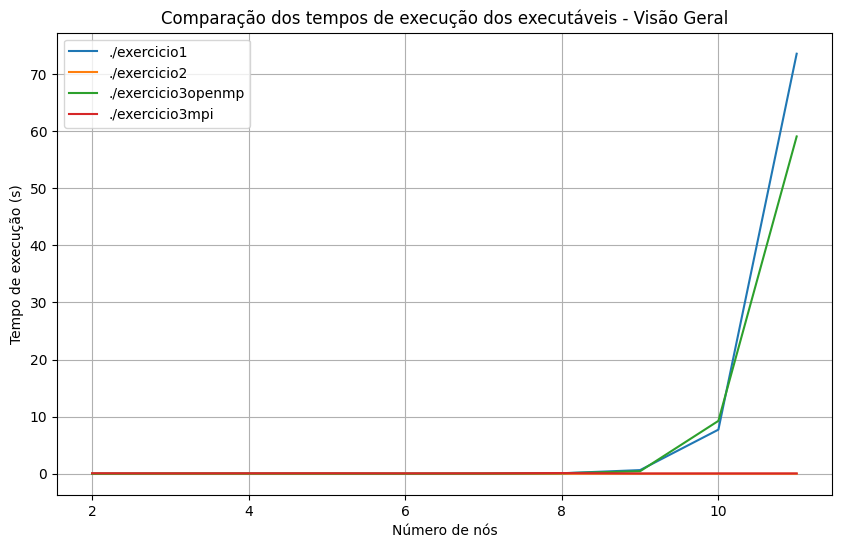

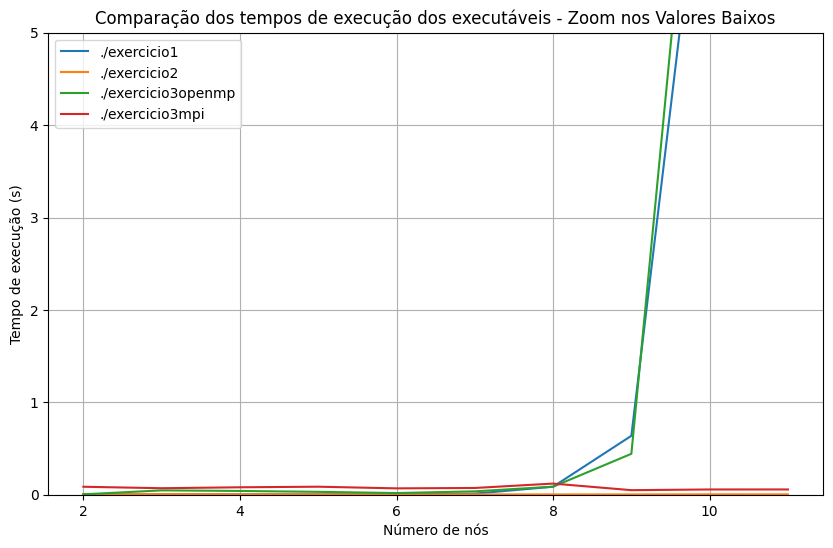

In [42]:
import os
import time
import random
import subprocess
import matplotlib.pyplot as plt

def gerar_dicionario_demandas(N):
    return {i: random.randint(1, 10) for i in range(1, N)}

def gerar_entradas_grafo(num_nos, max_peso=100, probabilidade=0.25):
    grafo = {}
    for i in range(1, num_nos):
        grafo[(0, i)] = random.randint(1, max_peso)
        grafo[(i, 0)] = grafo[(0, i)]
    for i in range(1, num_nos):
        for j in range(i+1, num_nos):
            if random.random() < probabilidade:
                peso = random.randint(1, max_peso)
                grafo[(i, j)] = peso
                grafo[(j, i)] = peso
    return grafo

def salvar_grafo(nome_arquivo, num_nos, demandas, grafo):
    with open(nome_arquivo, 'w') as arquivo:
        arquivo.write(f"{num_nos}\n")
        for local, demanda in demandas.items():
            arquivo.write(f"{local} {demanda}\n")
        arquivo.write(f"{len(grafo)}\n")
        for aresta, peso in grafo.items():
            arquivo.write(f"{aresta[0]} {aresta[1]} {peso}\n")

def medir_tempo_execucao(executavel, arquivo_entrada, num_procs=None):
    start_time = time.time()
    if num_procs:
        command = ['mpirun', '--allow-run-as-root', '-np', str(num_procs), executavel, arquivo_entrada]
    else:
        command = [executavel, arquivo_entrada]

    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    end_time = time.time()
    return end_time - start_time

num_nos_lista = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
executaveis = ['./exercicio1', './exercicio2', './exercicio3openmp', './exercicio3mpi']
tempos_execucao = {exec: [] for exec in executaveis}

for num_nos in num_nos_lista:
    demandas = gerar_dicionario_demandas(num_nos)
    grafo = gerar_entradas_grafo(num_nos)
    salvar_grafo('grafo.txt', num_nos, demandas, grafo)

    for executavel in executaveis:
        if executavel == './exercicio3mpi':
            tempo = medir_tempo_execucao(executavel, 'grafo.txt', num_procs=2)  # Executar com 1 processo
        else:
            tempo = medir_tempo_execucao(executavel, 'grafo.txt')
        tempos_execucao[executavel].append(tempo)

# Impressão dos tempos de execução de forma organizada
print("Tempos de Execução (s):")
for executavel in executaveis:
    print(f"{executavel}: {tempos_execucao[executavel]}")

# Gráfico geral
plt.figure(figsize=(10, 6))
for executavel in executaveis:
    plt.plot(num_nos_lista, tempos_execucao[executavel], label=executavel)
plt.xlabel('Número de nós')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação dos tempos de execução dos executáveis - Visão Geral')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico com zoom nos valores mais baixos de Y
plt.figure(figsize=(10, 6))
for executavel in executaveis:
    plt.plot(num_nos_lista, tempos_execucao[executavel], label=executavel)
plt.ylim(0, 5)
plt.xlabel('Número de nós')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação dos tempos de execução dos executáveis - Zoom nos Valores Baixos')
plt.legend()
plt.grid(True)
plt.show()


---

### Avaliação dos Resultados

#### Comparações das Abordagens com Tamanhos Diferentes de Grafos

Os gráficos apresentados mostram uma comparação do tempo de execução dos diferentes executáveis em função do número de nós no grafo. Aqui estão as observações detalhadas:

1. **Gráfico de Visão Geral**:
   - **Exercício 1** (Busca Global) apresenta um aumento significativo no tempo de execução à medida que o número de nós cresce. Isso é esperado, pois a busca global é uma abordagem exaustiva que verifica todas as possíveis combinações.
   - **Exercício 2** (Heurística de Clarke e Wright) é bem mais eficiente que o exercício 1. Como heurística, espera-se que seja mais rápida, sacrificando a exatidão pelo desempenho. Entretanto, eu fiz testes com casos de nós menores e a exatidão permaneceu, ou seja, o resultado dele era o correto, porém com um tempo de execução extremamente menor.
   - **Exercício 3 com OpenMP e MPI** apresentam tempos de execução muito menores em comparação com a abordagem sequencial de busca exaustiva (exercício 1). A abordagem paralela permite dividir o trabalho entre múltiplos processos, resultando em tempos de execução mais rápidos.

2. **Gráfico com Zoom nos Valores Baixos**:
   - Para números de nós pequenos (2 a 8), todos os executáveis apresentam tempos de execução comparáveis, com as diferenças se tornando mais pronunciadas à medida que o número de nós aumenta.

#### Clareza na Comunicação dos Resultados

Os gráficos fornecem uma visualização clara da performance relativa de cada abordagem. Adicionalmente, a divisão em dois gráficos (um com visão geral e outro com zoom nos valores baixos) ajuda a destacar tanto a escalabilidade das abordagens quanto as diferenças de desempenho em grafos menores.

#### Justificativas

1. **Execução Paralela vs Sequencial**:
   - Como esperado, a execução paralela (Exercício 3 com OpenMP e MPI) é mais rápida que a sequencial de busca global(Exercício 1). Isso se deve à capacidade de dividir a carga de trabalho entre múltiplos núcleos/processos, reduzindo assim o tempo total de execução.

2. **Heurística vs Busca Global**:
   - A heurística de Clarke e Wright (Exercício 2) é mais rápida que a busca global (Exercício 1), o que é consistente com a teoria. As heurísticas encontram soluções aproximadas rapidamente, enquanto a busca global tenta todas as combinações possíveis, resultando em um aumento exponencial do tempo de execução com o aumento do número de nós.

### Análise da Heurística de Clarke e Wright

A Heurística de Clarke e Wright foi a abordagem com o melhor tempo de execução, mesmo sendo sequencial. Aqui estão algumas razões para isso:

1. **Eficiência da Heurística**:
   - A Clarke e Wright é uma heurística desenvolvida especificamente para problemas de roteamento de veículos, como o problema do caixeiro viajante, onde se busca minimizar o custo de roteamento. Sua eficiência vem da capacidade de encontrar soluções próximas do ótimo sem a necessidade de explorar todas as combinações possíveis.

2. **Complexidade Computacional**:
   - A heurística não precisa examinar todas as possíveis rotas. Em vez disso, ela constrói a solução incrementalmente, tomando decisões locais baseadas em um critério de economia, o que reduz significativamente o tempo de execução.

### Desempenho do OpenMP com Aumento do Número de Nós

O OpenMP apresentou um aumento no tempo de execução com o crescimento do número de nós. Algumas possíveis razões para isso são:

1. **Overhead da Paralelização**:
   - A paralelização envolve algum overhead para gerenciar múltiplos threads e sincronizar os resultados. Quando o número de nós é pequeno, o overhead pode ser comparável ou até maior que o tempo de execução do trabalho paralelo, resultando em um desempenho inferior.

2. **Escalabilidade e Comunicação**:
   - Para grafos maiores, a quantidade de trabalho paralelo aumenta, mas também aumenta a necessidade de comunicação e sincronização entre os threads. Isso pode levar a contenções e ineficiências, especialmente se os threads tiverem que esperar uns pelos outros ou compartilhar muitos recursos.

3. **Eficiência da Implementação**:
   - A eficiência da implementação do algoritmo paralelo pode variar dependendo de como a tarefa é dividida entre os threads. Uma divisão desigual do trabalho ou a presença de gargalos podem impactar negativamente o desempenho.

### Conclusão

Os resultados mostram que a Heurística de Clarke e Wright e a execução paralela com MPI oferecem uma solução extremamente eficiente para o problema proposto, destacando-se como as abordagens com o melhor tempo de execução. A execução paralela com OpenMP também apresenta melhorias significativas em relação à busca exaustiva, embora o aumento do número de nós possa introduzir overheads e desafios de escalabilidade.

---

## Critérios de avaliação

A correção do projeto levará em conta:

+ [Até 1 pontos] **Organização geral**
  - Organização do código fonte e/ou do notebook que centraliza seus códigos. Se a entrega for via jupyter notebook, ele deve conter células markdown que guiem a apreciação do trabalho. Caso seu código esteja organizado em arquivos ".cpp", ".py", etc, submeta também um relatório em PDF descrevendo seu trabalho;

+ [Até 4 pontos] **Implementações**
  - Sua entrega deve conter ao menos 3 implementações (uma para cada solução: exaustiva, OpenMP e MPI). Soluções extras nestas vertentes são encorajadas e serão valorizadas;
  - A parte de MPI deve ser obrigatoriamente executada no cluster. Portanto, submeta também os arquivos de configuração dos executáveis em batch;
  - Esperamos códigos seguindo as boas práticas de implementação e devidamente comentados;

+ [Até 3 pontos] **Avaliação de resultados**
  - Comparações das abordagens com tamanhos diferentes de grafos;
  - Clareza na comunicação dos resultados. Ex: gráficos e/ou pequenos textos que descrevem os resultados obtidos;
  - Justificativas: é esperado que a execução paralela seja mais rápida que a sequencial, assim como uma heurística seja mais rápida que a abordagem exaustiva. Caso seus resultados diferem do esperado, argumente potenciais causas;

+ [Até 1 ponto] **Extras**
  - A rubrica não cita o máximo de implementações a ser feita. Caso você opte por fazer algo além das 4 solicitadas, daremos até 1 ponto extra na nota do trabalho pelo esforço;


